In [1]:
import numpy as np
import scipy.linalg as sp
import matplotlib.pyplot as plt

вариант = len('МезенцевГлебВладимирович')%30
вариант

24

![](img/6_1.png)
![](img/6_2.png)

![](img/6_3.png)
![](img/6_4.png)
![](img/6_5.png)

### Задаём условие

In [2]:
a = 1
b = 1.44

def p(x):
    c = np.array([1.3, 0.5, 2.1, 5.7, 6.3, -3.7])
    return np.sum(c * [x**i for i in range(c.shape[0])])

### Аналитеческое решение

$$\int_{1}^{1.44} (1.3+0.5x+2.1x^2+5.7x^3+6.3x^4-3.7x^5) dx = (1.3x + 0.25x^2+0.7x^3+1.425x^4+1.26x^5+\frac{37}{60}x^6)\bigg|_1^{1.44} = 8.59282$$

In [3]:
analytical_answer = 8.59282

### Вычисляем интеграл численно, считая отрезок [1, 1.44] элементарным и оцениваем погрешность

In [4]:
def Trapezoidal_elem(f, a, b):
    return (b-a)*(f(a)+f(b))/2

def Simpson_elem(f, a, b):
    return (b-a)*(f(a)+f(b)+4*f((a+b)/2.))/6

res_tr = Trapezoidal_elem(p, a, b)
res_s = Simpson_elem(p, a, b)
print ('Метод трапеций: \n\tОтвет:',res_tr, 'Абсолютная погрешность:',abs(res_tr-analytical_answer),
       '\nМетод Симпсона: \n\tОтвет:',res_s, 'Абсолютная погрешность:',abs(res_s-analytical_answer))

Метод трапеций: 
	Ответ: 8.750299994726399 Абсолютная погрешность: 0.1574799947263994 
Метод Симпсона: 
	Ответ: 8.590584594662399 Абсолютная погрешность: 0.0022354053376005822


### Расчитываем размер шага, необходимый для достижения ошибки 0.0001

$$R_{Trapezoidal} = \max_{1<=x<=1.44} {(|\frac{d^2f}{dx^2}|)}\frac{(b-a) h^2}{24}$$
$$\max_{1<=x<=1.44}{|\frac{d^2f}{dx^2}|} = \max_{1<=x<=1.44}{|4.2 + 34.2 x + 75.6 x^2 - 74 x^3|}=40$$
$$R_{Simpson} = \max_{1<=x<=1.44} {(|\frac{d^4f}{dx^4}|)}\frac{(b-a) h^4}{2880}$$
$$\max_{1<=x<=1.44}{|\frac{d^4f}{dx^4}|} = \max_{1<=x<=1.44}{|151.2 - 444 x|}=488.16$$

In [5]:
print('Оценка шага для метода трапеций:', round(np.power(12 * 0.0001 / (b - a) / 40, 1/2), 4),
      '\nОценка шага для метода Симпсона:', round(np.power(180 * 0.0001 / (b - a) / 488.16, 1/4), 4))

Оценка шага для метода трапеций: 0.0083 
Оценка шага для метода Симпсона: 0.0957


### Вычислим необходимое число интервалов

In [6]:
n_tr = np.ceil((b-a)/0.0083).astype(int)
n_s = np.ceil((b-a)/0.0957).astype(int)
n_tr, n_s

(54, 5)

### Для метода Симпсона берём 6 интервалов, так он работает только для чётного числа интервалов

In [7]:
def Trapezoidal(f, a, b, n):
    x_grid = np.linspace(a, b, n+1)[1:][:-1]
    return (b-a)/(2*n)*(f(a)+f(b)+2*np.sum([f(x) for x in x_grid]))

def Simpson(f, a, b, n):
    x_grid = np.linspace(a, b, n+1)[1:][:-1]
    return (b-a)/(3*n)*(f(a)+f(b)+2*np.sum([f(x) for x in x_grid[1::2]])+4*np.sum([f(x) for x in x_grid[::2]]))

res_tr = Trapezoidal(p, a, b, 54)
res_s = Simpson(p, a, b, 6)
print ('Метод трапеций: \n\tОтвет:',res_tr, 'Абсолютная погрешность:',abs(res_tr-analytical_answer),
       '\nМетод Симпсона: \n\tОтвет:',res_s, 'Абсолютная погрешность:',abs(res_s-analytical_answer))

Метод трапеций: 
	Ответ: 8.59287152293581 Абсолютная погрешность: 5.152293581112133e-05 
Метод Симпсона: 
	Ответ: 8.592792978995305 Абсолютная погрешность: 2.702100469420543e-05


### Ответы действительно находятся в рамках заданной погрешности

![](img/6_6.png)
![](img/6_7.png)
![](img/6_8.png)

### Задаём условие

In [8]:
a, b, x1, x2 = 1, 4, 1, 3

def Simpson(f, x, a, b, n):
    t_grid = np.linspace(a, b, n+1)[1:][:-1]
    return (b-a)/(3*n)*(f(x,a)+f(x,b)+2*np.sum([f(x,t) for t in t_grid[1::2]])+4*np.sum([f(x,t) for t in t_grid[::2]]))

def f(x, t):
    return t**2*(1-np.cos(x*t))

def F(x, f = f, a = a, b = b, eps = 1e-8, maxiter = 10):
    I = np.inf
    for i in np.logspace(1, maxiter, maxiter, base = 2).astype(int):
        I_n = Simpson(f, x, a, b, i)
        if np.abs(I-I_n)/15 < eps: #1/15 константа из правила Рунге для формулы Симпсона
            return I_n
        else:
            I = I_n
    return None

### Построим график функции

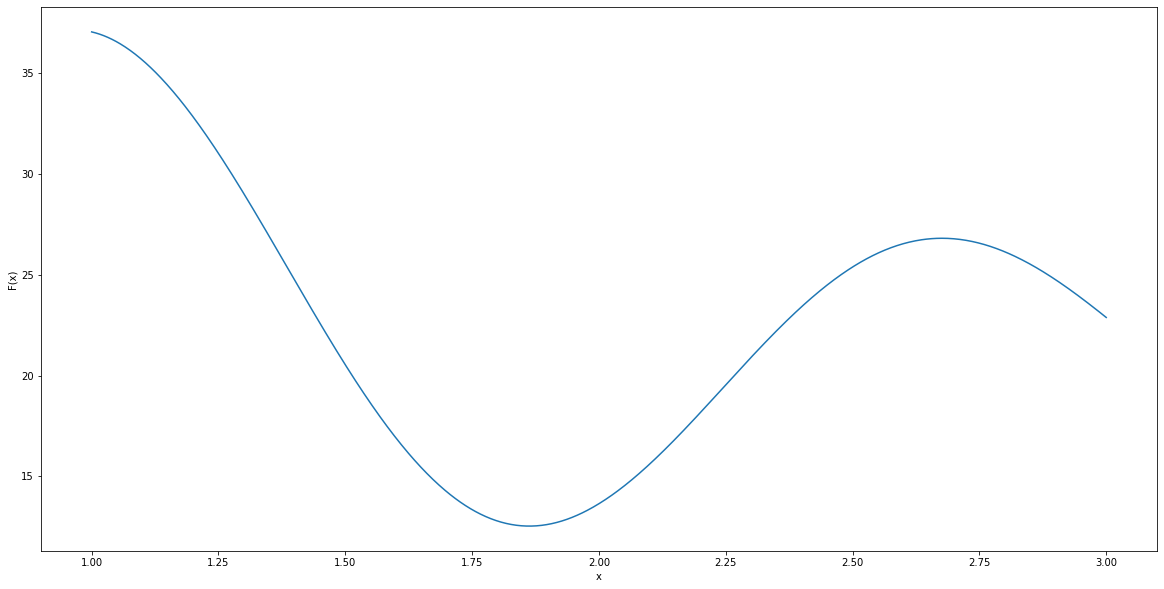

In [9]:
x_grid = np.linspace(x1, x2, 1000)
y_grid = [F(x) for x in x_grid]
plt.figure(figsize=(20,10))
plt.plot(x_grid, y_grid)
plt.xlabel('x')
plt.ylabel('F(x)');

![](img/6_9.png)
![](img/6_10.png)
![](img/6_11.png)

### Задаём условие

In [10]:
a, b, c, d = -1, 1, 0, 4

def f(x,y):
    return (x+y)*np.sin(x*y)

### Аналитический ответ $$\int_{-1}^1\int_0^4(x+y)sin(xy)dxdy = 2-\frac{Sin(4)}{2} ≈ 2.378$$

### Реализуем метод

In [11]:
def midpoint(f, a, b, c, d, eps = 0.001, maxiter = 20):
    I = np.inf
    for i in np.logspace(1, maxiter, maxiter, base = 2).astype(int):
        x_grid = np.linspace(a, b, i+1)[1:][:-1]
        y_grid = np.linspace(c, d, i+1)[1:][:-1]
        I_n = np.sum([[f(x, y) for y in y_grid]for x in x_grid])*(b-a)*(d-c)/i**2
        if np.abs(I-I_n) < eps: 
            return I_n
        else:
            I = I_n
    return None

In [12]:
print('Метод центральных прямоугольников:', round(midpoint(f, a, b, c, d), 3))

Метод центральных прямоугольников: 2.377


![](img/6_12.png)
![](img/6_13.png)
![](img/6_14.png)

### Задаём условие

In [13]:
a, b = 1, 1.44

def p(x):
    c = np.array([1.3, 0.5, 2.1, 5.7, 6.3, -3.7])
    return np.sum(c * [x**i for i in range(c.shape[0])])

analytical_answer = 8.59282

### Реализуем формулу Гаусса

In [14]:
def Gauss(f, a, b, n):
    coefs = [
                [
                    [0,2]
                ],
                [
                    [-0.577350269189626, 1],
                    [0.577350269189626, 1]
                ],
                [
                    [-0.77459666929954, 0.55555555555556],
                    [0, 0.88888888888888],
                    [0.77459666929954, 0.55555555555556]
                ],
                [
                    [-0.861136311594052, 0.347854845137454],
                    [-0.339981043584856, 0.652145154862546],
                    [0.339981043584856, 0.652145154862546],
                    [0.861136311594052, 0.347854845137454]
                ]
            ]
    return (b-a)/2*np.sum([cs[1]*f((a+b)/2+(b-a)/2*cs[0]) for cs in coefs[n]])

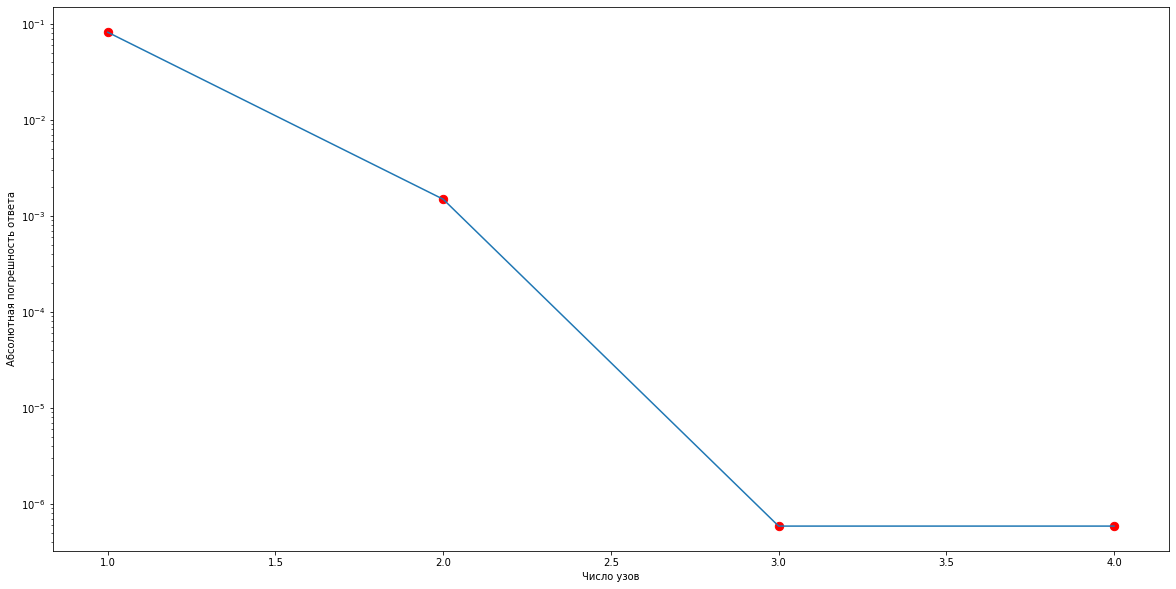

In [15]:
n_grid = np.arange(1, 5, 1)
errors = [np.abs(Gauss(p, a, b, i)-analytical_answer) for i in np.arange(0, 4, 1)]

plt.figure(figsize=(20,10))
plt.plot(n_grid, errors)
plt.scatter(n_grid, errors, c='r', s = 70)
plt.xlabel('Число узов')
plt.ylabel('Абсолютная погрешность ответа')
plt.yscale('log')

### Степень многочлена - 5, формулы для N+1 > (5-1)/2 = 2 ({3,4}) действительно точны

![](img/6_15.png)
![](img/6_16.png)
![](img/6_17.png)

### Задаём условие

In [16]:
def k(x,t):
    return 1/(8+(np.sin(x+t))**2)

def f(x):
    return np.cos(x)

lmbd, a, b = 0.2, 0, np.pi
n = 10
h = (b-a)/n

### Составим и решим систему уравнений

In [17]:
x_grid = np.arange(a, b, h)
B = np.array([f(x) for x in x_grid])
A = np.array([[-lmbd * k(x_grid[i], x_grid[j]) for j in range(n)] for i in range (n)])
A += np.eye(n, n)
y = np.linalg.solve(A,B)

### Построим график функции

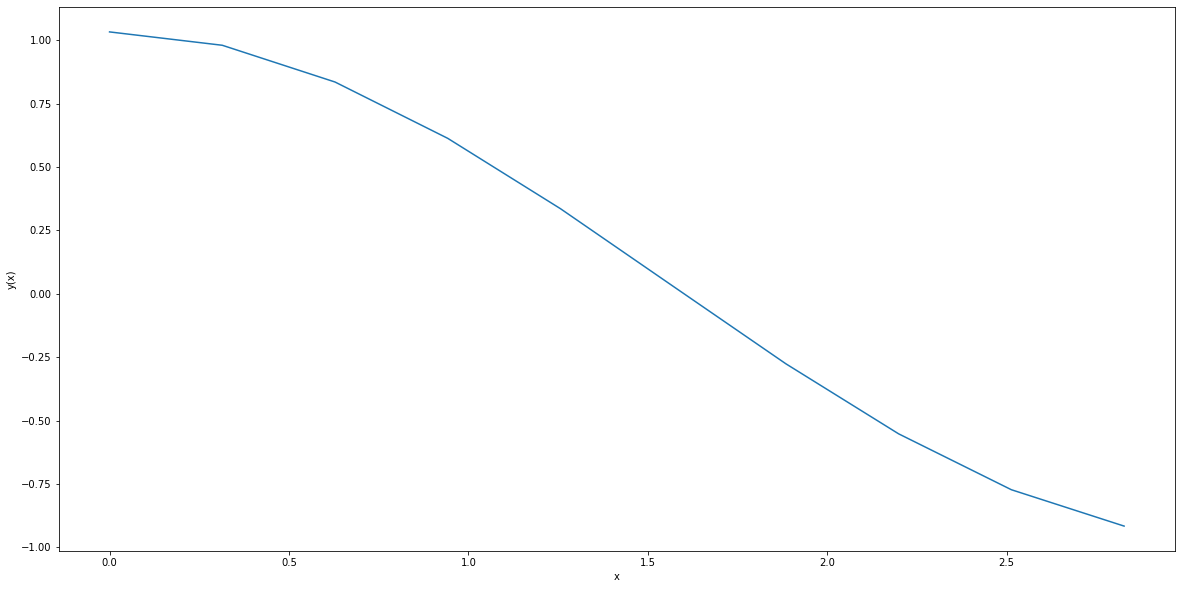

In [18]:
plt.figure(figsize=(20,10))
plt.plot(x_grid, y)
plt.xlabel('x')
plt.ylabel('y(x)');